Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
Visualize the results of your clustering.
Use the elbow method to visually select a good value for k.
Repeat the clustering, this time with 3 different features.
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [1]:
#importing
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from pydataset import data

from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split

import wrangle_mall as w

In [2]:
#load iris dataset
iris_df = data('iris')

In [3]:
#rename columns for ease of use
iris_df = iris_df.rename(columns={"Sepal.Length": "sepal_length",
                        "Sepal.Width": "sepal_width",
                        "Petal.Length": "petal_length",
                        "Petal.Width": "petal_width",
                        "Species": "species"})

In [4]:
#I might use these features later
iris_df['sepal_area']= iris_df.sepal_length * iris_df.sepal_width
iris_df['petal_area']= iris_df.petal_length * iris_df.petal_width

In [5]:
#split the data into train, validate, test
train_validate, test = train_test_split(iris_df, test_size=.2, random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [6]:
#Scale our data
scaler = sklearn.preprocessing.StandardScaler()

cols = ['sepal_length','sepal_width','petal_length','petal_width','sepal_area','petal_area']

train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.fit_transform(validate[cols])
test_scaled[cols] = scaler.fit_transform(test[cols])

In [7]:
#select features
X = train_scaled[['petal_width', 'sepal_width']]

In [8]:
#let's try 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [9]:
#make a column with these predictions
train_scaled['cluster'] = kmeans.predict(X)
train_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
56,-0.175228,-0.537127,0.406925,0.120997,versicolor,-0.505066,0.011359,0
141,1.061678,0.167852,1.050759,1.631826,virginica,0.908042,1.691599,2
15,-0.051538,2.282788,-1.524576,-1.389832,setosa,1.621941,-1.230558,1
68,-0.051538,-0.772119,0.172804,-0.291047,versicolor,-0.593202,-0.376049,3
18,-0.917373,1.107823,-1.407515,-1.252484,setosa,0.050188,-1.190711,1


In [10]:
#get the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,0.445139,-0.292734
1,-1.307423,0.966828
2,1.211702,0.430491
3,0.056363,-1.421805


Text(0.5, 1.0, 'Visualizing Cluster Centers')

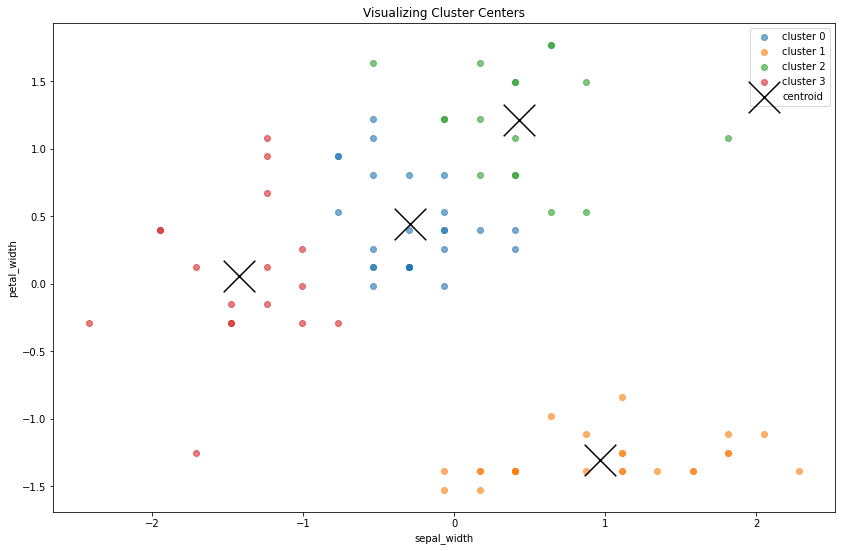

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

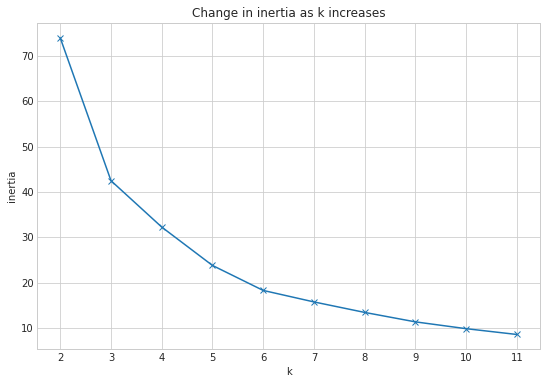

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
X = train_scaled[['petal_width', 'sepal_width','petal_length']]

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
train_scaled['cluster_2'] = kmeans.predict(X)

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width,petal_length
0,1.043976,0.271249,1.001594
1,-1.307423,0.966828,-1.356009
2,0.193711,-0.910350,0.260599


Text(0.5, 1.0, 'Visualizing Cluster Centers')

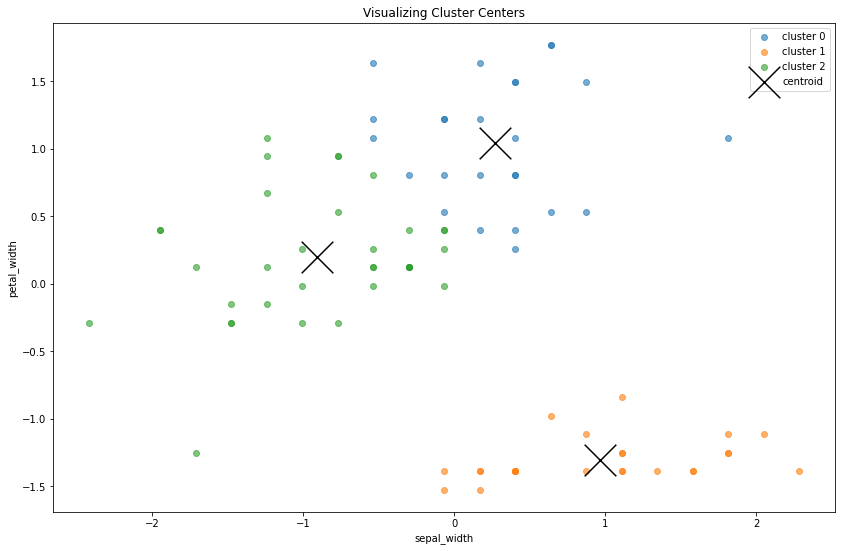

In [16]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_2'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

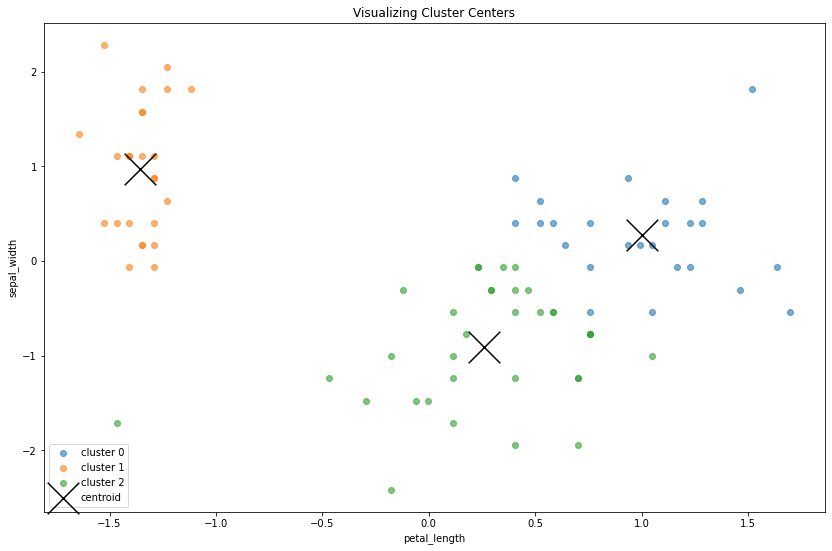

In [17]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_2'):
    plt.scatter(subset.petal_length, subset.sepal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='petal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

In [18]:
X = train_scaled[['petal_length', 'petal_width','petal_area']]

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
train_scaled['cluster_3'] = kmeans.predict(X)

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,petal_width,petal_area
0,1.041394,1.148361,1.252744
1,-1.360241,-1.305310,-1.195819
2,0.282770,0.158456,-0.006888


Text(0.5, 1.0, 'Visualizing Cluster Centers')

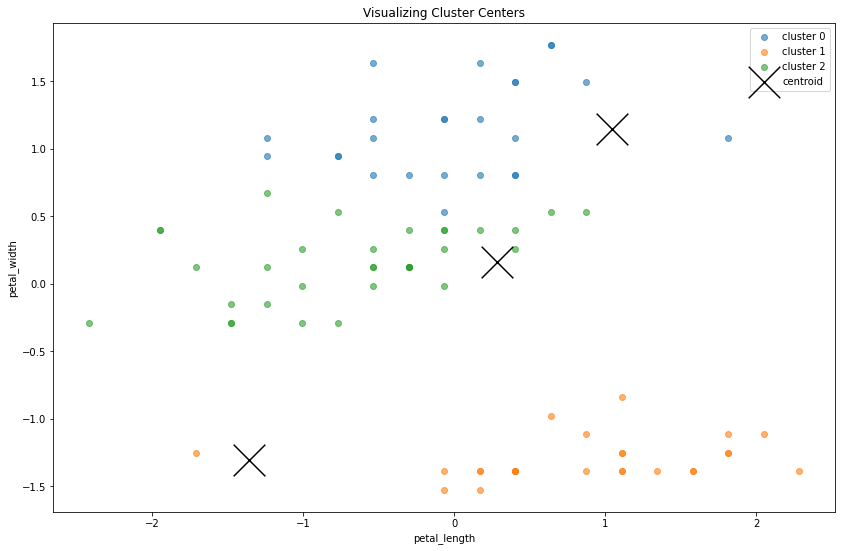

In [21]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_3'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='petal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

In [23]:
## Mall_customer dataset
df = w.get_mallcustomer_data()
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
